In [1]:
import sys
# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "/home/vanessa/hulk/cocpit") 

import cocpit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [3]:
# rename models for plotting
model_names = [
    "efficient",
    "resnet18",
    "resnet34",
    "resnet152",
    "alexnet",
    "vgg16",
    "vgg19",
    "densenet169",
    "densenet201",
]
new_names = [
    "Efficient-b0",
    "ResNet-18",
    "ResNet-34",
    "ResNet-152",
    "AlexNet",
    "VGG-16",
    "VGG-19",
    "DenseNet-169",
    "DenseNet-201",
]


convert_names = {model_names[i]: new_names[i] for i in range(len(new_names))}
convert_names

{'efficient': 'Efficient-b0',
 'resnet18': 'ResNet-18',
 'resnet34': 'ResNet-34',
 'resnet152': 'ResNet-152',
 'alexnet': 'AlexNet',
 'vgg16': 'VGG-16',
 'vgg19': 'VGG-19',
 'densenet169': 'DenseNet-169',
 'densenet201': 'DenseNet-201'}

In [6]:
train_csv = "/home/vanessa/hulk/ai2es/saved_accuracies/v0.0.0/train_acc_loss_e20_bs64_k0_9model(s).csv"
df_train = pd.read_csv(
    train_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)

df_train.replace(convert_names, inplace=True)


In [7]:
val_csv = "/home/vanessa/hulk/ai2es/saved_accuracies/v0.0.0/val_acc_loss_e20_bs64_k0_9model(s).csv"
df_val = pd.read_csv(
    val_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)
df_val.replace(convert_names, inplace=True)


In [8]:
save_name = "/home/vanessa/hulk/ai2es/plots/loss_acc_9model(s)_bs64_e15_k0.png"
colors = {
    "Efficient-b0": "#C76114",
    "ResNet-18": "#CAE1FF",
    "ResNet-34": "#3063A5",
    "ResNet-152": "#162252",
    "AlexNet": "#FCDC3B",
    "VGG-16": "#9E0508",
    "VGG-19": "#CD9B9B",
    "DenseNet-169": "#9CBA7F",
    "DenseNet-201": "#006633",
}
num_epochs = 20
kfold = 0
num_models = 9


In [9]:
# reshape data
if kfold == 0:
    val_accs = df_val["Accuracy"].values.reshape(num_models, num_epochs)
    val_losses = df_val["Loss"].values.reshape(num_models, num_epochs)
    train_accs = df_train["Accuracy"].values.reshape(num_models, num_epochs)
    train_losses = df_train["Loss"].values.reshape(num_models, num_epochs)
else:
    val_accs = np.average(
        df_val["Accuracy"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    val_losses = np.average(
        df_val["Loss"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    train_accs = np.average(
        df_train["Accuracy"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    train_losses = np.average(
        df_train["Loss"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    

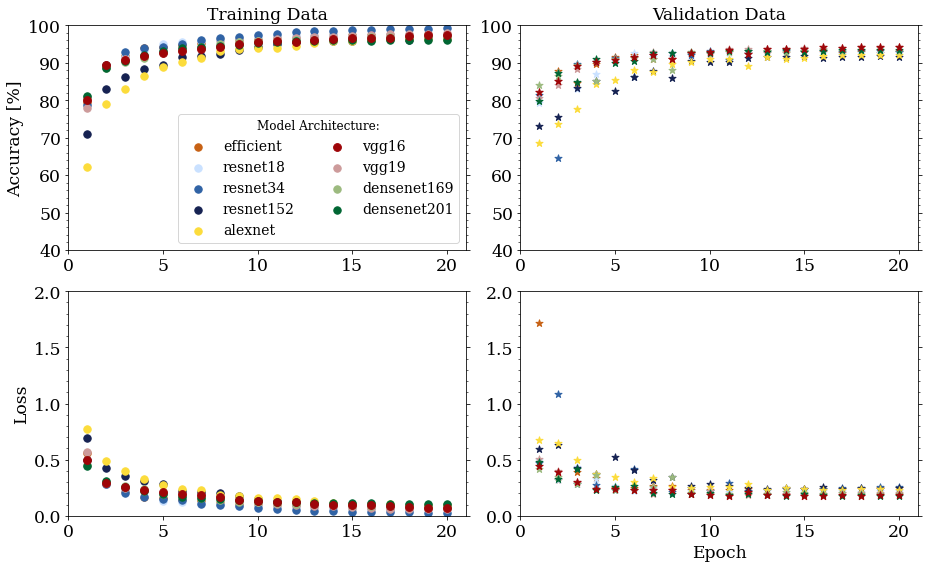

In [10]:
a = cocpit.plotting_scripts.acc_loss.AccLossPlot(model_names, num_epochs, save_name, colors, new_names, savefig=True)
a.create_plot(train_accs, val_accs, train_losses, val_losses)
